In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso

In [141]:
insurance1 = pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv')

In [142]:
insurance1.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


## Data Characteristics

In [143]:
insurance1.shape

(1338, 8)

In [144]:
insurance1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [145]:
insurance1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


### Classification of columns

In [146]:
def seprate_data_types(insurance1):
    categorical = []
    continuous = []
    for column in insurance1.columns:              
        if insurance1[column].nunique() < 100:      
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(insurance1)        


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ------------
age            bmi
sex            charges
classif
children
smoker
region


## Data Cleaning

In [147]:
insurance1.isna().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

### Null Value treatment

In [148]:
insurance1["classif"].fillna(insurance1.classif.mode()[0], inplace=True)

In [149]:
insurance1.isna().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values in dataset

### Outlier Treatment

In [150]:
df=insurance1

In [151]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3 - Q1
    lower_fence= Q1 - 1.5*IQR
    upper_fence= Q3 + 1.5*IQR
    ls = df.index[(df[ft]<lower_fence)|(df[ft]>upper_fence)]
    return ls

In [152]:
index_list=[]
for x in ['age']:
    index_list.extend(outliers(df,x))

In [153]:
index_list

[116, 565]

In [154]:
# remove outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [155]:
insurance=remove(df,index_list)

In [156]:
insurance.shape

(1336, 8)

## Exploratory Data Analysis (EDA)

### Univariate and Bivariate Analysis

### Charges (Target Column)

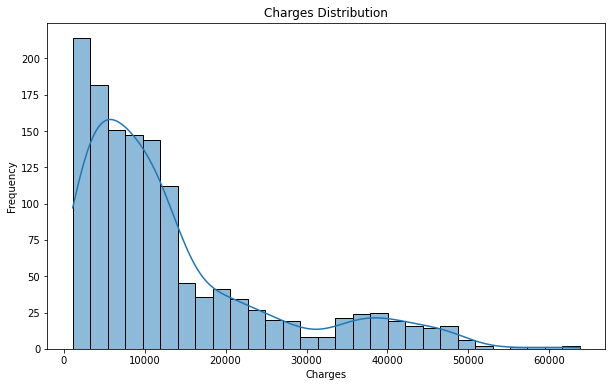

Mean: 13280.17607358458
Median: 9382.033


In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(x='charges', data=insurance, kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()
print(f'Mean: {(insurance["charges"].mean())}')
print(f'Median: {insurance["charges"].median()}')

### Age

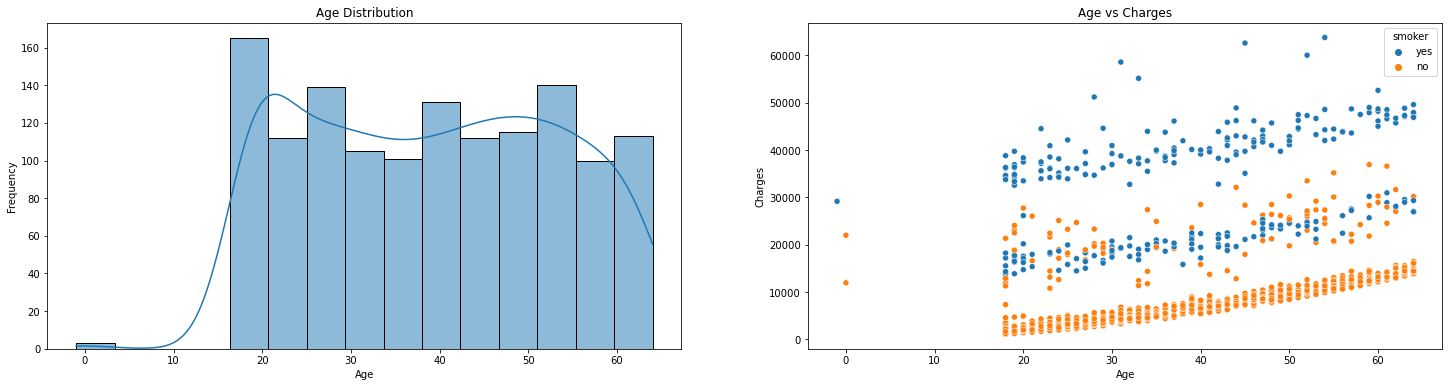

Mean: 39
Median: 39.0
Minimum Age: -1
Maximum Age: 64


In [158]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=insurance, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
print(f'Mean: {(insurance["age"].mean()):.0f}')
print(f'Median: {insurance["age"].median()}')
print(f'Minimum Age: {insurance["age"].min()}')
print(f'Maximum Age: {insurance["age"].max()}')

With the increase in age the charges of insurance increases adn if the person is smoker the charges are high

### Sex

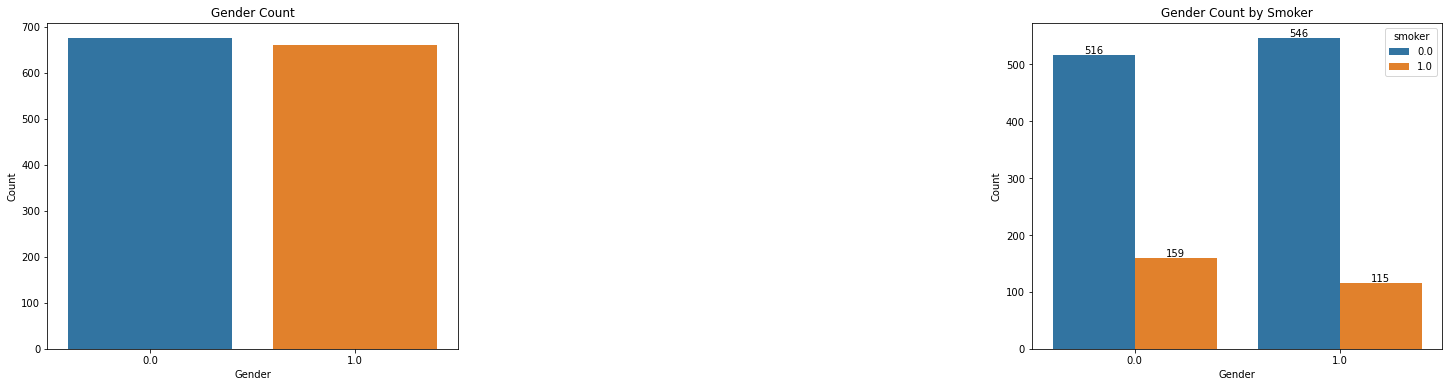

In [192]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='sex', data=insurance)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
fig = sns.countplot(x='sex', data=insurance, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count by Smoker')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Body Mass Index (BMI)

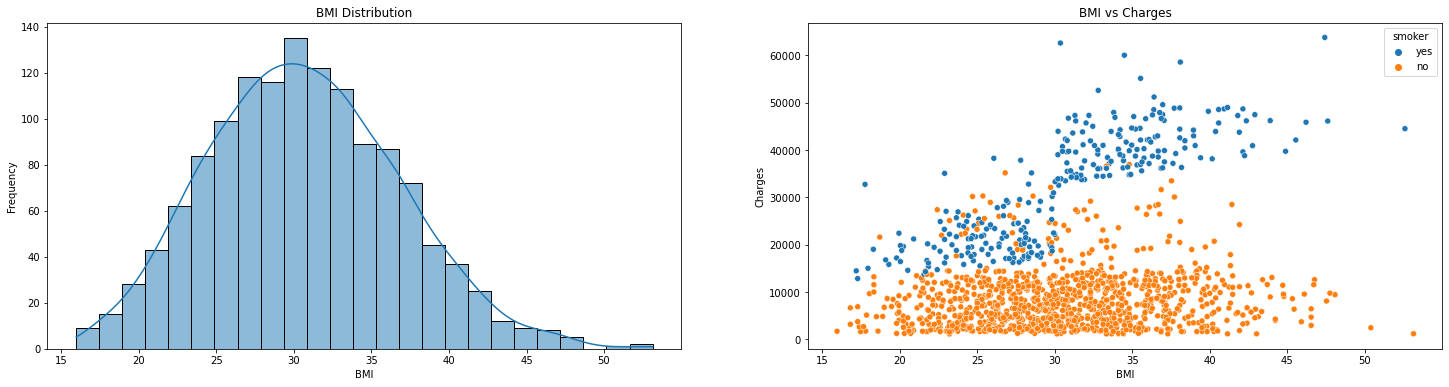

Mean: 30.64975299401196
Median: 30.38


In [160]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=insurance, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()
print(f'Mean: {(insurance["bmi"].mean())}')
print(f'Median: {insurance["bmi"].median()}')

People with high BMI have high insurance charges and its very high in case person has high bmi and is a smoker

### Children

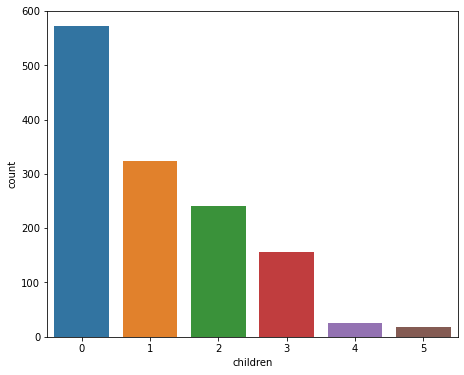

In [161]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='children', data=insurance)

### classif

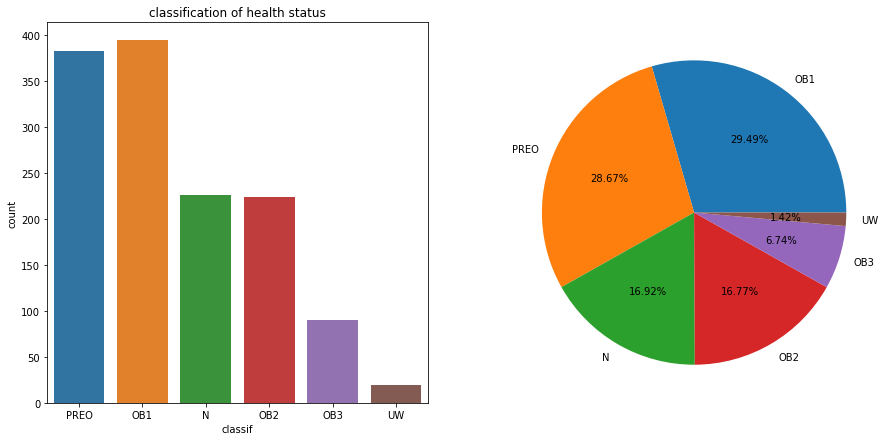

In [162]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("classification of health status")                
percentage = insurance["classif"].value_counts()      
labels = list(insurance["classif"].value_counts().index) 

sns.countplot(x = insurance["classif"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### Smoker

Text(0.5, 1.0, 'Smoker Percentage')

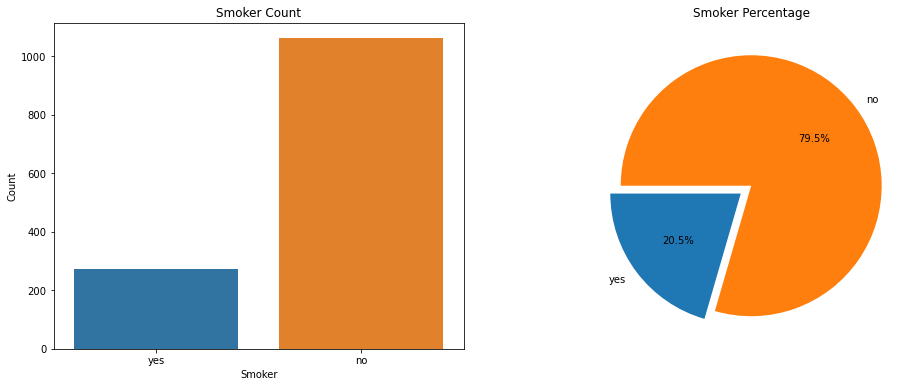

In [163]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='smoker', data=insurance)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(insurance.smoker.value_counts().reindex(['yes', 'no']), labels=insurance.smoker.value_counts().reindex(['yes', 'no']).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')

### Region count by smokers

### Multivariate Analysis

C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<function matplotlib.pyplot.show(close=None, block=None)>

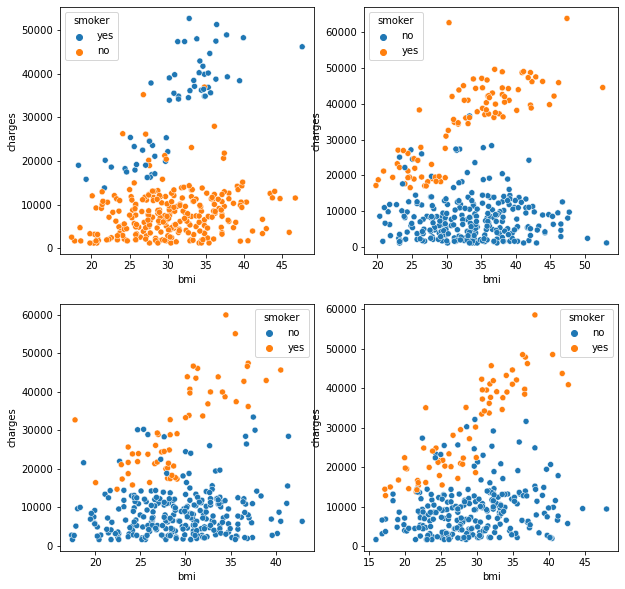

In [164]:
b=list(enumerate(insurance.region.unique()))
plt.figure(figsize=(10,10))
for x in b:
    plt.subplot(2,2,x[0]+1)
    sns.scatterplot('bmi','charges','smoker', data=insurance[insurance['region']==x[1]])
plt.show

### Correlation between Numerical Columns To Target

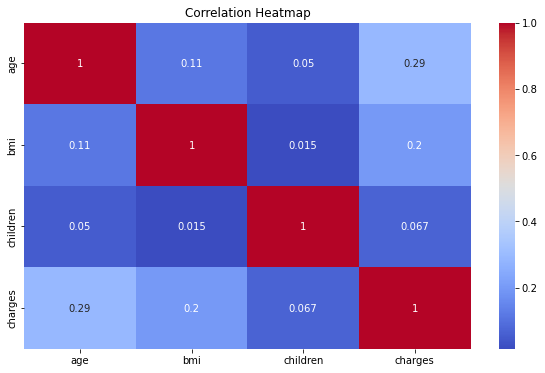

In [165]:
corr_num = insurance.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation of age vs bmi is 0.11

Correlation of age vs charges is 0.29


In [166]:
# insurance = insurance.drop(columns=['children','classif'])

### Correlation Between Categorical Columns To Target

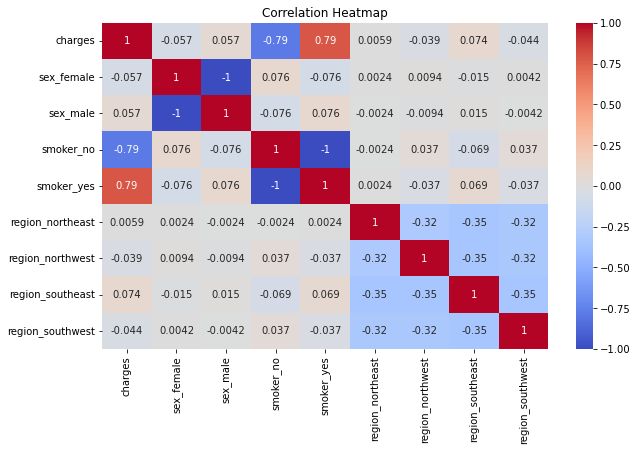

In [167]:
corr_cat = pd.get_dummies(insurance[['charges', 'sex', 'smoker', 'region']]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_cat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [168]:
insurance['sex'] = insurance['sex'].apply({'male':0,'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
insurance['classif'] = insurance['classif'].apply({'OB1':1, 'PREO':2, 'N':3, 'OB2':4, 'OB3':5, 'UW':6}.get)


In [169]:
insurance

,age,sex,bmi,classif,children,smoker,region,charges
0,19,1,27.900,2,0,1,1,16884.92400
1,18,0,33.770,1,1,0,2,1725.55230
2,28,0,33.000,1,3,0,2,4449.46200
3,0,0,22.705,3,0,0,3,21984.47061
4,32,0,28.880,2,0,0,3,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,1,3,0,3,10600.54830
1334,18,1,31.920,1,0,0,4,2205.98080
1335,18,1,36.850,4,0,0,2,1629.83350
1336,21,1,25.800,2,0,0,1,2007.94500


# Splitting Train and Test Data

In [170]:

x = insurance[['age','bmi', 'smoker']]
y = insurance[['charges']]

In [171]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
print(x.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1336, 3) (1336, 1)
(668, 3) (668, 1)
(668, 3) (668, 1)


## Model Evaluation

### Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

Accuracy: 0.7599112420021719
MAE: 4204.398611527749
MSE: 36585006.961134344


Accuracy of Linear Regression is 76%

In [173]:
df_scale= insurance
minmax= MinMaxScaler()

scale_columns= ['age','bmi','charges','region','smoker','children','classif','sex']
df_scale[scale_columns]=minmax.fit_transform(insurance[scale_columns])
df_scale.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,0.307692,1.0,0.321227,0.2,0.0,1.0,0.000000,0.251611
1,0.292308,0.0,0.479150,0.0,0.2,0.0,0.333333,0.009636
2,0.446154,0.0,0.458434,0.0,0.6,0.0,0.333333,0.053115
3,0.015385,0.0,0.181464,0.4,0.0,0.0,0.666667,0.333010
4,0.507692,0.0,0.347592,0.2,0.0,0.0,0.666667,0.043816


### Ridge

In [174]:
myRidge = Ridge(alpha = 1).fit(X_train, y_train)

In [175]:
prediction = myRidge.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, prediction)}')


MSE: 36694703.81490852


In [176]:
print(f'MAE: {mean_absolute_error(y_test, prediction)}')

MAE: 4224.6022694869735


In [177]:
print(f'Accuracy: {r2_score(y_test, prediction)}')

Accuracy: 0.7591913574492759


Accuracy of Linear Regression Ridge is 75.9% ~ 76%

### Lasso

In [178]:
myLasso = Lasso(alpha = 1).fit(X_train, y_train)
prediction = myLasso.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, prediction)}')

MSE: 36588132.252747364


In [179]:
print(f'MAE: {mean_absolute_error(y_test, prediction)}')

MAE: 4204.950001355201


In [180]:
print(f'Accuracy: {r2_score(y_test, prediction)}')

Accuracy: 0.7598907323058761


Accuracy of Linear Regression Lasso is 75.98% ~ 76%

### So Linear Regressor is providing 76% accurate prediction

### Decision Tree Regressor

In [181]:
 from sklearn.tree import DecisionTreeRegressor

In [182]:
dtm= DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print ("Score:",(dtm.score(X_test,y_test)))

Score: 0.8558784946448472


In [183]:
pred=dtm.predict(X_test)


In [184]:
print(f'MAE: {mean_absolute_error(y_test, pred)}')

MAE: 2736.4784751147818


In [185]:
print(f'MSE: {mean_squared_error(y_test, pred)}')

MSE: 21961404.276643064


### Decision Tree Regressor is providing 85.5% of accuarate predictions

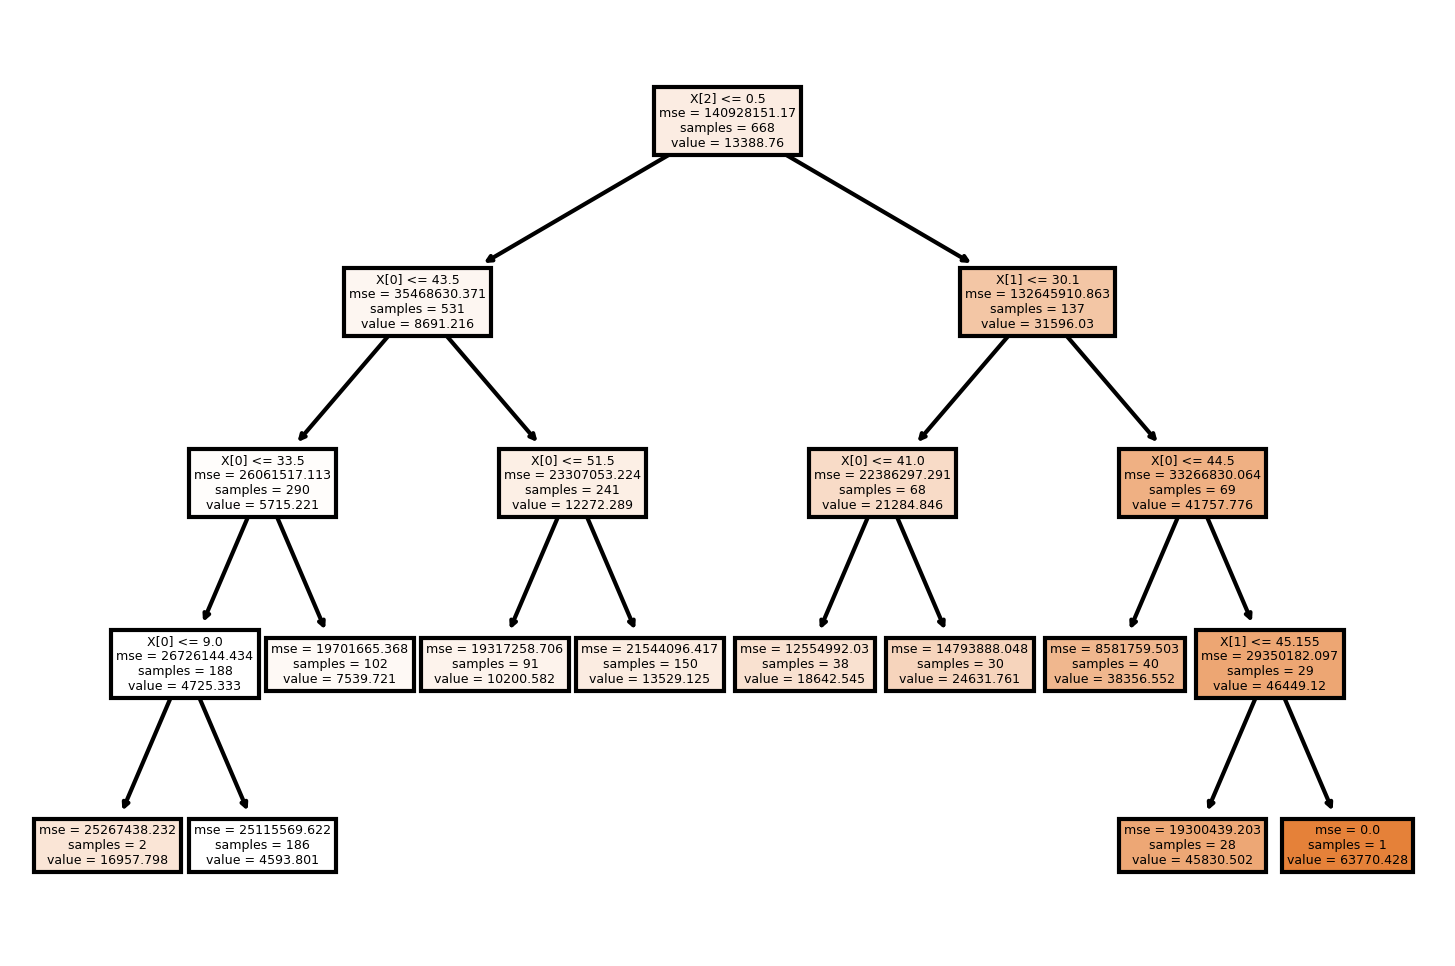

In [186]:
from sklearn import tree
fig, ax = plt.subplots(dpi=300)
tree.plot_tree(dtm, filled=True)
plt.show()

## Random Forest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor
from numpy import  mean
from numpy import std
results=list()
model = RandomForestRegressor(max_depth=3,random_state=2)
model.fit(X_train,y_train)
predict=model.predict(X_test)    
results.append(model.score(X_test,y_test))
print(' score : %.3f  (%.3f)' % (mean(results),std(results)))   

 score : 0.861  (0.000)


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9448/4073384003.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


In [188]:
print(f'MSE: {mean_squared_error(y_test, predict)}')
print(f'MAE: {mean_absolute_error(y_test, predict)}')

MSE: 21160018.511558738
MAE: 2717.3181249428585


### Random Forest Regressor is providing 86.1% of accurate predictions

## AdaBoostRegressor

In [189]:
from sklearn.ensemble import AdaBoostRegressor

rfa = AdaBoostRegressor()
rfa = rfa.fit(X_train,y_train)
pred_ada = rfa.predict(X_test)

C:\Users\AdityaKumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [190]:
score=r2_score(y_test,pred_ada)
print("r2 score is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_ada))
print("Mean Squared Error :",mean_squared_error(y_test,pred_ada))                  
#print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred_ada)))

r2 score is  0.7802613787210854
Mean Absolute Error : 4937.092966925501
Mean Squared Error : 33484029.223858446


### AdaBoost Regressor is providing 79% of accurate predictions

## Conclusion

### Linear Regression is providing 76% of accurate predictions
### Decision Tree Regressor is providing 85.5% of accuarate predictions
### Random Forest Regressor is providing 86.1% of accurate predictions
### AdaBoost Regressor is providing 79% of accurate predictions

### Random Forest Regressor is giving most accurate predictions on testing data and hence is best fit model which can be used to find out the charges of insurance.